In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import BinaryCrossentropy
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import os

##Upload Kaggle.json api key here##

In [25]:
from google.colab import files
files.upload()

print('Uploaded!')

Saving kaggle.json to kaggle (4).json
Uploaded!


##Configure kaggle to be used in Google Colab##

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!pip install -q kaggle
!pip install -q kaggle-cli

     |████████████████████████████████| 81kB 8.8MB/s 
     |████████████████████████████████| 5.3MB 15.6MB/s 
     |████████████████████████████████| 133kB 65.3MB/s 
     |████████████████████████████████| 112kB 60.0MB/s 
     |████████████████████████████████| 51kB 10.0MB/s 


In [5]:
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

100% 3.58G/3.58G [01:06<00:00, 30.7MB/s]
100% 3.58G/3.58G [01:06<00:00, 58.2MB/s]


##Unzip required files##

In [6]:
import zipfile
with zipfile.ZipFile('/content/fruits-fresh-and-rotten-for-classification.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/fruits')

In [7]:
!mkdir -p /content/final/train
!mkdir -p /content/final/test

In [8]:
!mv /content/fruits/dataset/train/freshapples /content/final/train
!mv /content/fruits/dataset/train/rottenapples /content/final/train

!mv /content/fruits/dataset/test/freshapples /content/final/test
!mv /content/fruits/dataset/test/rottenapples /content/final/test

In [9]:
!rm -r /content/fruits

##Finished importing required datasets!##

View one image from each class


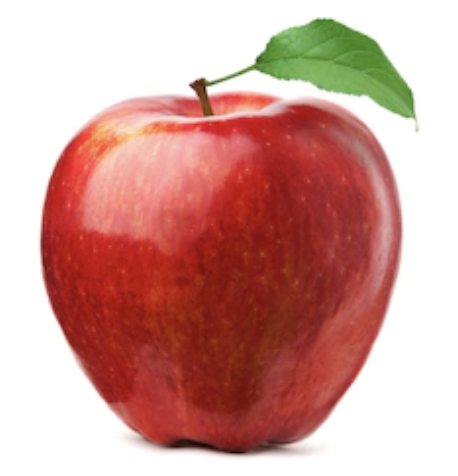

In [10]:
Image.open('/content/final/train/freshapples/Screen Shot 2018-06-08 at 4.59.36 PM.png')

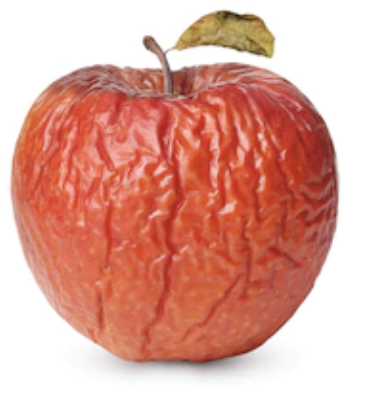

In [11]:
Image.open('/content/final/train/rottenapples/Screen Shot 2018-06-07 at 2.15.20 PM.png')

Preprocessing for Training set

In [12]:
imgs = []
#0 for rotten, 1 for fresh
labels = []

for file in os.listdir('/content/final/train/freshapples'):
  path = '/content/final/train/freshapples/' + file
  img = Image.open(path)
  img = img.resize((150,150))
  #Remove the alpha channel (So everything is (150,150,3) instead of some being (150,150,4) )
  imgArr = np.array(img)[:,:,:3]
  imgs.append(imgArr)

  labels.append(1)


for file in os.listdir('/content/final/train/rottenapples'):
  path = '/content/final/train/rottenapples/' + file
  img = Image.open(path)
  img = img.resize((150,150))
  #Remove the alpha channel (So everything is (150,150,3) instead of some being (150,150,4) )
  imgArr = np.array(img)[:,:,:3]
  imgs.append(imgArr)

  labels.append(0)

In [26]:
imgsTest = []
#0 for rotten, 1 for fresh
labels_Test = []

for file in os.listdir('/content/final/test/freshapples'):
  path = '/content/final/test/freshapples/' + file
  img = Image.open(path)
  img = img.resize((150,150))
  #Remove the alpha channel (So everything is (150,150,3) instead of some being (150,150,4) )
  imgArr = np.array(img)[:,:,:3]
  imgsTest.append(imgArr)

  labels_Test.append(1)


for file in os.listdir('/content/final/test/rottenapples'):
  path = '/content/final/test/rottenapples/' + file
  img = Image.open(path)
  img = img.resize((150,150))
  #Remove the alpha channel (So everything is (150,150,3) instead of some being (150,150,4) )
  imgArr = np.array(img)[:,:,:3]
  imgsTest.append(imgArr)

  labels_Test.append(0)

In [27]:
imgs_arr = np.array(imgs)
labels_arr = np.array(labels)

imgsTest_arr = np.array(imgsTest)
labels_Test_arr = np.array(labels_Test)

In [46]:
input_shape = (150,150,3)
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    MaxPooling2D(2, 2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss=BinaryCrossentropy(from_logits=True), optimizer = RMSprop(0.001), metrics=['accuracy'])

Fit the model

In [47]:
model.fit(x=imgs_arr, y = labels_arr, epochs=10, verbose=1)

Epoch 1/10
127/127 [==============================] - 2s 13ms/step - loss: 8.2865 - accuracy: 0.6101
Epoch 2/10
127/127 [==============================] - 2s 12ms/step - loss: 0.4350 - accuracy: 0.8367
Epoch 3/10
127/127 [==============================] - 2s 12ms/step - loss: 0.3378 - accuracy: 0.8724
Epoch 4/10
127/127 [==============================] - 2s 12ms/step - loss: 0.2867 - accuracy: 0.8862
Epoch 5/10
127/127 [==============================] - 2s 12ms/step - loss: 0.2271 - accuracy: 0.9153
Epoch 6/10
127/127 [==============================] - 2s 12ms/step - loss: 0.2220 - accuracy: 0.9206
Epoch 7/10
127/127 [==============================] - 2s 12ms/step - loss: 0.1979 - accuracy: 0.9279
Epoch 8/10
127/127 [==============================] - 2s 12ms/step - loss: 0.1747 - accuracy: 0.9333
Epoch 9/10
127/127 [==============================] - 2s 12ms/step - loss: 0.1486 - accuracy: 0.9426
Epoch 10/10
127/127 [==============================] - 2s 12ms/step - loss: 0.1240 - accura

Evaluate the accuracy of the model

In [48]:
model.evaluate(x=imgsTest_arr, y = labels_Test_arr)

32/32 [==============================] - 0s 4ms/step - loss: 0.1560 - accuracy: 0.9378


[0.15598709881305695, 0.9377509951591492]

Saving appz.jpg to appz (1).jpg
Fresh Apples :)


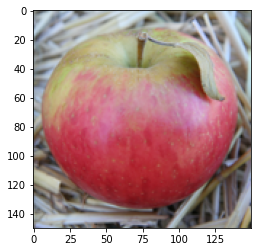

In [49]:
from google.colab import files
uploaded = files.upload()
 
for filename in uploaded.keys():
  img = Image.open(filename)
  img = img.resize((150,150))
  imgArr = np.array(img)[:,:,:3]
  plt.imshow(imgArr)
  #Must add another dimension to account for the number of images (which is 1 in this case)
  imgArr = imgArr.reshape((1,150,150,3))

  preds = model.predict(imgArr)[0,0]

  threshold = 0.5

  if preds > threshold:
    print('Fresh Apples :)')
  else:
    print('Rotten Apples :(')